# Index
## 1. Data analysis and preprocessing techniques 
### 1.1 Data standardization
### 1.2 ONE-HOT ENCODE Tags
### 1.3 Data Augmentation (Optional)
### 1.4 ZCA WHITENING
## 2. Description and obtaining results of the different models
### 2.1. Model 1: CNN 
### 2.2. 2 models: Transfer Learning 
### 23. Models 3: Finetunning 
### 2.4. General analysis of models and graphics 
## 3. Explanability with GradCam 
### 3.1. Visualization with GradCam 
### 3.2. Critical analysis 
## 4. Conclusions

## 1. Data analysis and preprocessing techniques

DATASET DESCRIPTION

In [39]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


We check the dimensions of the Training and Test Sets. We see that we have tensioners of the form: \
For X data are $[instances]\times [width]\times[height]\times[Canales= RGB]$, being RGB Red, Green and Blue. \
For data from y son $[instances]\times[clases]$, where classes can take as values ​​$clases\in[0,1,\ldots, 9]$

In [40]:
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 1)


We make a partial visualization of the images to visually check the types of classes

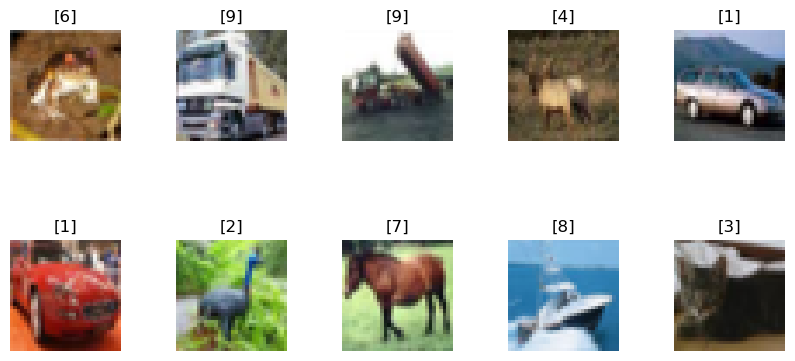

In [41]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
axes = axes.ravel()                            
for i in np.arange(0, 10):                      
    axes[i].imshow(X_train[i])                  
    axes[i].set_title(y_train[i])                 
    axes[i].axis('off')                         
plt.subplots_adjust(wspace=0.5)                 

We know that the 255 value indicates white and 0 black. Therefore, there is an important frequency of white pixels. This was to be expected just by seeing some of the images above.

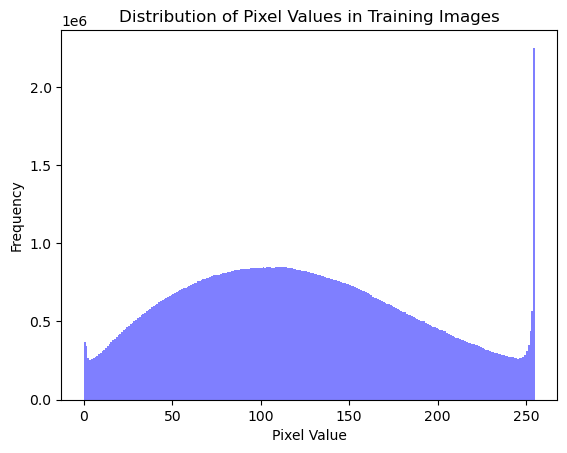

In [42]:
plt.hist(X_train.flatten(), bins=255, color='blue', alpha=0.5)
plt.title("Distribution of Pixel Values in Training Images")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

### 1.1 Data standardization

One of the reasons why is normalized to move from $[0,255]$ a $[0,1]$ is to avoid the SGD algorithm suffer from Explaning or Vanishing Gradients. \
Standardization only applies to x_train and x_test because y_train e y_test are classes.

In [43]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

We perform a first visual inspection of the data. We also verify that the range of values ​​is $[0,1]$. This is because it could happen that you had data below 0 or above 1 that we did not see.

In [44]:
print(X_train)

#Minimo y Maximo
print(X_train.min())
print(X_train.max())

[[[[0.23137255 0.24313726 0.24705882]
   [0.16862746 0.18039216 0.1764706 ]
   [0.19607843 0.1882353  0.16862746]
   ...
   [0.61960787 0.5176471  0.42352942]
   [0.59607846 0.49019608 0.4       ]
   [0.5803922  0.4862745  0.40392157]]

  [[0.0627451  0.07843138 0.07843138]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509805 0.21568628]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117648 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215687 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941177 0.19607843]
   [0.47058824 0.32941177 0.19607843]
   [0.42745098 0.28627452 0.16470589]]

  ...

  [[0.8156863  0.6666667  0.3764706 ]
   [0.7882353  0.6        0.13333334]
   [0.7764706  0.6313726  0.10196079]
   ...
   [0.627451   0.52156866 0.27450982]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333334 0.07843138]]

  [[0.7058824  0.54509807 0.3764706 ]
   [0.6

We see how the tensioner's structure remains the same. Only their values ​​have changed

In [45]:
print(X_train.shape)

(50000, 32, 32, 3)


### 1.2 ONE-HOT ENCODE Tags

We remember that and it is of the form $[instances]\times[clases]$, where classes can take as values ​​$clases\in[0,1,\ldots, 9]$\
We are interested

What is the reason? As we are in a multiclase classification problem. The loss function used is categorical crossentropy. This cannot work with vectors where classes take values ​​between 0 and 9, but need to be one-hot vectors of the form $[0, 0, \ldots, 1, 0, 0]$ because otherwise you would be classifying in various classes at the same time and you just want me to do it in one. \
In binary case the expression is of the form
$$ CE = -\sum_{i=1}^{2} t_i \log(s_i) = -t_1 \log(s_1) - (1 - t_1)\log(1 - s_1) $$

For the general case the expression is of the form
$$ CE = -\sum_{i=1}^{C} t_i \log(s_i) $$

If, for example, we had the following one-hot vector $t=[0,0,0, \ldots, 0, 1]$ then we would only have a single function
$$ CE = -\sum_{i=1}^{C} t_i \log(s_i) =  - t_9 \log(s_9) $$

With $s_9$ being the associated probability.Reference: https://gombru.github.io/2018/05/23/cross_untropy_loss/

In [46]:
from keras.utils import np_utils                 

y_train = np_utils.to_categorical(y_train, 10)   
y_test = np_utils.to_categorical(y_test, 10)     

In [47]:
y_train 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

### 1.3 Data Augmentation

In [48]:
from keras.preprocessing.image import ImageDataGenerator

Here we configure the generator that will make random transformations about the image every time the model needs it during training

In [49]:
datagen = ImageDataGenerator(     
    rotation_range=10,            
    width_shift_range=0.1,        
    height_shift_range=0.1,      
    horizontal_flip=True        
)                               
datagen.fit(X_train)            

### 1.4 ZCA WHITENING

We apply ZC Whitening because it transforms the data so that they have variance 1, makes the characteristics not correlated with each other, Covariance Zero and preserves the spatial structure of the images better than PCA Whitening

In [ ]:
# 1. Flatten the images to obtain a 2D matrix: (num_images, num_pixels)
X_train_flat = X_train.reshape((X_train.shape[0], -1))

# 2. Center the data: subtract the mean of each feature (pixel)
X_mean = np.mean(X_train_flat, axis=0)
X_centered = X_train_flat - X_mean

# 3. Compute the covariance matrix
sigma = np.cov(X_centered, rowvar=False)

# 4. Eigenvalue and eigenvector decomposition
U, S, _ = np.linalg.svd(sigma)

# 5. Compute the ZCA Whitening matrix
epsilon = 1e-5
ZCA_matrix = np.dot(U, np.dot(np.diag(1.0 / np.sqrt(S + epsilon)), U.T))

# 6. Apply the ZCA transformation
X_whitened = np.dot(X_centered, ZCA_matrix)

# 7. Reshape back to the original image format (N, 32, 32, 3)
X_train_zca = X_whitened.reshape(X_train.shape)

# 8. Apply ZCA on the test set (using the same mean and ZCA matrix from training)
X_test_flat = X_test.reshape((X_test.shape[0], -1))
X_test_centered = X_test_flat - X_mean  # Use training mean
X_test_whitened = np.dot(X_test_centered, ZCA_matrix)
X_test_zca = X_test_whitened.reshape(X_test.shape)


We adjust the model and graph

In [51]:
datagen.fit(X_train_zca)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


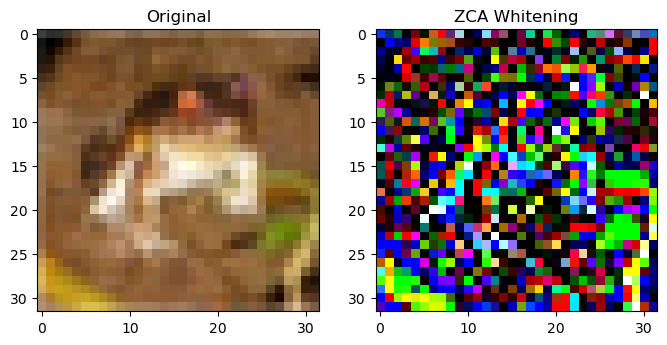

In [ ]:
# Show original and whitened image
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(X_train[0])
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(X_train_zca[0])
plt.title("ZCA Whitened")
plt.show()


## 2. Description and obtaining results of the different models

<h3><b>Summary</b></h3>      <!-- Grande -->
The idea of ​​this section is to test 3 different models, which will successively improving their yields. In the first model a simple CNN is built, with the minimum structure learned in the course to give a "decent" performance. In model 2 we take another step of sophistication and decided to "import" a model of keras, that is, a series of layers with already trained neurons. This will make the best performance model 2 than model 1. \
Finally, in model 3 we decided to defrost some layers and train them with the DATASET CIFFAR-10. We obtain a better performance still than model 2.

### 2.1. Model 1: CNN

As indicated in the PEC, the CNN model will be the baseline (Baseline). \
From what I have read in mandatory readings, videos of the campus and in other sources, there is no certainty prior to how the model to achieve its best performance must be. So I have decided to apply a simple and "standard" model slightly modifying something to improve its results.


Sources:\
<a href="https://gist.github.com/eblancoh/d379d92a3680360857581d8937ef114b" style="color: white; text-decoration: underline;">Clasificación de imágenes (CIFAR-10 data-set)</a>\
<a href="https://ijrpr.com/uploads/V5ISSUE12/IJRPR36421.pdf" style="color: white; text-decoration: underline;">Transfer Learning: Performance Analysis of VGG-16 on CIFAR-10</a>

We define the architecture of our CNN using a name of name *Baseline_Model *. \
We know that as we are working with the Dataset Cafar-10 the tensioner is of the form *[instances] x [Weight] x [height] x [Channels] *. We are not interested in the instances in the tensioner we indicate at the entrance so we only indicate: *[Weight] x [height] x [Channels] * *


<h3><b>Summary</b></h3>      <!-- Grande -->
<span style="font-size:22px;"><b>first layer of layers</b></span>

**1. Convolutionary layer** \
The first part of our CNN is constituted by a Capa of convolutional type and padding. The purpose of the convolutionary layers is to capture the characteristics of the images. Use the pixels of the entrance to the kernel carried out by the convolutional operation, the exit being a Feauture Maps that collects the characteristics learned.The choice of the values ​​of their parameters are the following.
As the dimension of the image is (32,32,1) 32 neurons are necessary. Giving a justification of the kernel dimension is difficult, so I have chosen to choose what usually appears in the sources: (3, 3). \
For the padding I have chosen Same. This decision is important. The padding generates at the edges of the image rows and columns of zeros whose purpose is not to reduce the dimensionality at the exit. When you do this you do not lose the information of the edges of the image. \
Being the first convolution I think it is convenient not to lose such information.** 2. Maxpooling Layer ** \
After the convolutionary layer we apply the maxpooling layer. \
This layer as the Max function on the pixels of each group uses, extracts the most important characteristics, that is, the most important. Here we do not apply Padding.

Each Nuerone makes a weighted sum of the entrances it receives, this value is passed through the RELUT Activation Function.

Reading online, I have seen that there are many reasons why Relu is chosen. The best explanations I have found are in StackexChange, I leave two justifications and their links.

1 reason: introduces linearity, without it the CNN is just a multiplications of matrices and maximum groups2 Reason: The other alternatives frequently generate more problems that it reluces. For example, if we choose Tanh or sigmoids then we have the problem of the gradient. Values ​​close to its ends $\{-1,1\}$y $\{0,1\}$ give rise to zero gradient. Therefore, we would not have backpropagation. \
As the relative derivative is constant and value 1 there is no problem.** References ** \
<a href = "https://stackoverflow.com/Questions/47370505/why-is-relu-is-used-as-activation-unit-in-convolutional-neural-network" style = "color: white; text-decoration: underline;" In convolutional neural Network? </a> \
<a href = "https://stats.stackexchenge.com/Questions/363190/Why-we-use-activation-function-after-convolution-layer-in-convolution-Neural -net" Style = "Color: White; Text-Decoration: Underline;" We use Activation Function after convolution layer in convolution neural Network? </a>


Tensioning flow: \
Input (32, 32, 3) -> Conv2D -> (32, 32, 3) -> Maxpooling -> (16, 16, 32)


<span style = "font-size: 22px;"> <b> second block of layers </b> 

we apply the same two previous layers, convolution and padding, but the parameters chosen are different. \
As we are working on with a dataset of images, what we are looking for is to show features and greater variety of them. For this we go from 32 to 64 neurons that are the characteristics for us (or combination of them). Being more characteristics, these will also be more complex. \
For example, if before we only differentiated between being or not horse, now we can also differentiate whether it is male or female or can also be understood with colors. Now we not only know if a series of pixels are green but also if they are dark or light green.In short, it is a common practice to progressively increase the number of characteristics as progress is made in the layers of a CNN.

The Maxpooling layer is applied again for the same reason. With the Fucnion Max, only what stands out most is most characteristic of the group of pixels evaluated in the pooling is selected.

Tensioning flow: \
INPUT (16, 16, 32) -> CONV2D -> (16, 16, 64) -> Maxpooling -> (8, 8, 64)


<Span Style = "Font-Size: 22px;"> <b> Third Block of Layers </b> </pan>

**1. Dense Layer** \
Now we go to the multiclase classification. We want based on the characteristics that we have generated to classify the images in the different classes (in this case 10).Therefore, our goal is to pass the characteristics obtained to a classifying function. As the dense layers (Fully Conneccted) only admit 1D vectors, the first thing we have to do is a conversion of the layer of the layer block before a 1D vector. We use the Layer Flatten that flattened the entrance from (8, 8, 64) to (4096,). That is, a vector of 4096 elements.

The first dense layer combines the characteristics extracted from the CCN in the previous layers in 128 neurons. The Actu activation function is used for the same reason as before, so that there is no problem in the Backward Propagation.** 2. Dropout Layer ** \
This layer the only purpose is to avoid the overfitting of the model. It is common for this to occur with models with a lot of parameters and dataset. In our case, the dataset is 50000 elements (few) and the parameters are 128.
Make a random turning off a percentage of the total neurons in the training stage (Training).


**3. Dense Layer** \
As we are in a classification problem, the last Layer must necessarily apply a softmax type activation function and the output vector is a probabilities vector of the form (10,) (Nª of classes). \


Tensioning flow: \
Input (8, 8, 64) -> Flatten (4096,) -> Dense (128) (128,) -> Dropout (0.5) (128,) -> dense (10,) (10,)\
**Reference:**\
<a href = "https://arxiv.org/pdf/1608.06993" Style = "Color: White; Text-Decoration: Underline;"

<h3><b>Segunda Parte</b></h3>

The loss function, optimizer and metric are chosen and as usually done in campus practices. I have not found a reason for other sources not to do so

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Use the ZCA images if applied, otherwise simply X_train
input_shape = X_train_zca.shape[1:]  # (32, 32, 3)

def baseline_model():

    model = Sequential()  # Sequential model definition
    
    # First convolutional layer
    model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same", input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second convolutional layer
    model.add(Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Dense and output layers
    model.add(Flatten())         # Flatten feature maps
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.5))      # Prevent overfitting
    model.add(Dense(10, activation="softmax"))  # 10 classes

    return model


# Call the function and store the created model in a variable
model = baseline_model()  

# Compile the model
model.compile(
    optimizer=Adam(),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Summary of the architecture
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 4096)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

Here we train the CNN model with the x_train_zca e y_train

In [ ]:

#Training with the augmentation date
batch_size = 64
epochs = 20

history = model.fit(
    datagen.flow(X_train_zca, y_train, batch_size=batch_size),
    validation_data=(X_test_zca, y_test),
    steps_per_epoch=X_train_zca.shape[0] // batch_size,
    epochs=epochs
)

Epoch 1/20
781/781 [==============================] - 42s 45ms/step - loss: 1.7737 - accuracy: 0.3400 - val_loss: 1.3913 - val_accuracy: 0.5012
Epoch 2/20
781/781 [==============================] - 33s 42ms/step - loss: 1.4557 - accuracy: 0.4711 - val_loss: 1.2960 - val_accuracy: 0.5565
Epoch 3/20
781/781 [==============================] - 21s 27ms/step - loss: 1.3403 - accuracy: 0.5112 - val_loss: 1.1287 - val_accuracy: 0.6158
Epoch 4/20
781/781 [==============================] - 22s 28ms/step - loss: 1.2662 - accuracy: 0.5491 - val_loss: 1.3127 - val_accuracy: 0.5783
Epoch 5/20
781/781 [==============================] - 22s 28ms/step - loss: 1.2148 - accuracy: 0.5698 - val_loss: 1.1067 - val_accuracy: 0.6183
Epoch 6/20
781/781 [==============================] - 22s 28ms/step - loss: 1.1785 - accuracy: 0.5819 - val_loss: 1.0735 - val_accuracy: 0.6365
Epoch 7/20
781/781 [==============================] - 22s 28ms/step - loss: 1.1547 - accuracy: 0.5945 - val_loss: 1.0486 - val_accuracy:

We evaluate the model.

In [56]:
# Final evaluation of the model
scores = model.evaluate(X_test_zca, y_test, verbose=0)
print("Accuracy: %0.2f%%" % (scores[1] * 100))

Accuracy: 67.93%


### 2.2. 2 models: Transfer Learning

<Span Style = "Font-Size: 20px;"> <b> 1 Transfer Learning explanation </b>

The central idea of ​​transfer learning is to choose a previously trained model (Pre-Trained Model) and select a part of its neuronal network (Transfer Layers), usually all except the final layer of the Hidden Layer type to use it with our original DATASET CIFFAR-10.

The frozen weights in the statement of the PEC refer to the parameters W of the neurons that belong to Transfer Layers. Therefore, they are used directly because they have already been trained. \
To congratulate them we use mobilenetv2_model. Trainable = false

Something important of this type of models is to adjust the data of the DATASET CIFFAR-10 to the type of input required by the selected model, in this case it is Mobilenetv2.<Span Style = "Font-Size: 20px;"> <b> 

2 Transfer Learning Structure </b>
Only the structure is exposed since each part later is commented
1. Adapt entrance to Mobilenetv2
2. Load the Mobilenetv2 pre -entry without final part
3. Added final layers
4. Compile and train the model
5. Evaluate the model


<Span Style = "Font-Size: 20px;"> <b> 3 conclusions </b> 

If we compare the performance of model 1 and 2 we see that the second is much better than the first: \
Model 1 -> Accuracy: 67.93%\
Model 2 -> Accuracy: 80.98%Some of the reasons for this improvement can be the following:
1. Dataset larger \
The selected Pre-Trained Model is Mobilenetv2, its dataset is enormous compared to the DATASET CIFFAR-10. Its dataset is 1.2 million images and 1000 classes while the CIFFAR-10 is only 50000 images and 10 classes. This makes when you train mobilenetv2 capture more general characteristics. \
On the other hand, in model 1 with CIFFAR-10 when so small it does not generalize well due to the lower number of Epochs.
2. Better designed \
The Mobilenetv2 model is best designed, is on the keras website among which the best performance. Therefore, it is obvious that a priori as a better result than mountains for yourself.**Sources**\
<a href = "https://www.geeksforgeeks.org/machine-learning/ml-inttroction-to-transfer-learning/" Style = "Color: White; Text-Decoration: Underline;"> What is Transfer Learning?
<a href = "https://www.geeksforgeeks.org/deep-learning/what-is-fine-tuning/" Style = "Color: White; Text-Decoration: Underline;"

<Span Style = "Font-Size: 22px;"> <b> 1 Adapt entry to Mobilenetv2 </b>

I had problems with the residence of the data. Specifically I got out as output: resourcexhaustederror. \
The reason is because the Mobilenetv2 model requires a structure of the input data other than the tensioner (32,32,3), which is the DATASET CIFFAR-10. \
This forces us to resize the tensioner (32,32,3) and turn it into (96, 96, 3), which is the structure admitted by Mobilenetv2. \
As it takes to execute every time the resignation is done, it is better to save it in two NPY files and use them onwards.

In [ ]:
# Resize on CPU using numpy + loop (safer for RAM)
X_train_resized = np.array([tf.image.resize(img, [96, 96]).numpy() for img in X_train])
X_test_resized = np.array([tf.image.resize(img, [96, 96]).numpy() for img in X_test])


We keep the surrender in two files

In [59]:
np.save("X_train_resized.npy", X_train_resized)
np.save("X_test_resized.npy", X_test_resized)

We load the files in the variables with the same name

In [ ]:
# Load the resized data on CPU
X_train_resized = np.load("X_train_resized.npy")
X_test_resized = np.load("X_test_resized.npy")


<Span Style = "Font-Size: 22px;"

Here we define the Mobilenetv2 model. The entrance is different from that worked in CNN, in this case it is (96,96,3). We eliminate the final dense part since it does not interest us that it is frozen. The weights are imagenet, that is, those who have already been previously trained

In [ ]:
# Load MobileNetV2 without the top classifier (no final dense layers)
MobileNetV2_model = MobileNetV2(
    input_shape=(96, 96, 3),
    include_top=False,     # remove the final dense layers from ImageNet
    weights="imagenet"     # use pretrained weights on ImageNet
)

# Freeze all layers (they will not be trained — this makes it Model 1, not Model 2)
MobileNetV2_model.trainable = False  # layers are frozen


<span style = "font-size: 22px;"> <b> 3 final layers added </b> </pan>

We add the final layers to perform the multiclase classification. In any classification we need to move from a tensioner in the way that is to a 1D vector being its elements the characteristics extracted by the model to deliver it to the last dense layer. 

**1. Flatten Layer** \
We use globalavengepooling2d () to pass the tensioner to vector1d. It is recommended to use this instead of Flatten () for pretended models. We have 1280 activation maps (3x3).


**2. Dense Layer** \
We use dense () to move from 1280 characteristics to 128 characteristics, the latter being a combination and amplification of the most relevant. As we use the Actu activation function, the irrelevant <0 are left out and then combine the rest that are relevant.** 3. Final Desense Layer ** \
Again we apply Dropout, so a % of the nuers are inactive during training \
We use a 10 nuerone dense layer again to obtain a probability vector of the 10 classes.


**Tensioners flow** \
Input (3, 3, 1280) -> Globalaveragepooling2D (1280,) -> dense (128) (128,) -> dense (10) (10,)

In [ ]:
# Build a new model on top of the MobileNetV2_model
x = MobileNetV2_model.output
x = GlobalAveragePooling2D()(x)   # reduce (3D) → (1D)
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation="softmax")(x)  # variable x accumulates all layers

# Final model
model = Model(inputs=MobileNetV2_model.input, outputs=predictions)


The next two code blocks are to ensure that the structure of Y_Train_cat and Y_TEST_CAT can be admitted to this new model 2. 

**Note**\
I had many problems in this part. In the end it is only to deliver to the model an One-Hot type vector.

In [ ]:
print(y_train.shape)     # initial tensor (50000, 1)
print(y_train_cat.shape) # tensor after using categorical (50000, 10, 10)


(50000, 10)
(50000, 10, 10)


In [ ]:
# This should be (50000, 1)
print(y_train.shape)

# Make sure to remove previous encoding if it was already applied
y_train = np.argmax(y_train, axis=1) if y_train.shape[1] == 10 else y_train
y_test = np.argmax(y_test, axis=1)   if y_test.shape[1] == 10 else y_test

# Now apply one-hot encoding correctly
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train.ravel(), 10)
y_test_cat = to_categorical(y_test.ravel(), 10)

# Check final correct shape
print(y_train_cat.shape)  # (50000, 10)
print(y_test_cat.shape)   # (10000, 10)


(50000, 10)
(50000, 10)
(10000, 10)


<Span Style = "Font-Size: 22px;"> <b> 4 compile and train the </b> </pan> model

Here everything is equal to model 1, but with the variables defined throughout the section of model 2.

In [ ]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Training with data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train_resized)

# One-hot encoding if not done already
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Train only the new layers (MobileNetV2 is frozen)
history = model.fit(
    datagen.flow(X_train_resized, y_train_cat, batch_size=64),
    validation_data=(X_test_resized, y_test_cat),
    epochs=15,
    steps_per_epoch=len(X_train) // 64
)


Epoch 1/15
781/781 [==============================] - 100s 124ms/step - loss: 1.0682 - accuracy: 0.6324 - val_loss: 0.6821 - val_accuracy: 0.7701
Epoch 2/15
781/781 [==============================] - 136s 174ms/step - loss: 0.8588 - accuracy: 0.7070 - val_loss: 0.6282 - val_accuracy: 0.7858
Epoch 3/15
781/781 [==============================] - 135s 173ms/step - loss: 0.8183 - accuracy: 0.7164 - val_loss: 0.6200 - val_accuracy: 0.7852
Epoch 4/15
781/781 [==============================] - 109s 140ms/step - loss: 0.7923 - accuracy: 0.7262 - val_loss: 0.6015 - val_accuracy: 0.7930
Epoch 5/15
781/781 [==============================] - 65s 83ms/step - loss: 0.7739 - accuracy: 0.7317 - val_loss: 0.5928 - val_accuracy: 0.8007
Epoch 6/15
781/781 [==============================] - 64s 82ms/step - loss: 0.7588 - accuracy: 0.7378 - val_loss: 0.5907 - val_accuracy: 0.7988
Epoch 7/15
781/781 [==============================] - 67s 85ms/step - loss: 0.7463 - accuracy: 0.7422 - val_loss: 0.5774 - val_a

<Span Style = "Font-Size: 22px;"> <b> 5 Evaluate the model </b> </s

We see a clear performance improvement of the model evaluated using the ACCURACY.

In [73]:
# Final evaluation of the model
scores = model.evaluate(X_test_resized, y_test_cat, verbose=0)
print("Accuracy: %0.2f%%" % (scores[1] * 100))

Accuracy: 80.98%


### 23. Models 3: Finetunning

<Span Style = "Font-Size: 20px;"> <b> 1 explanation fine tunning </b> </pan> \
Model 3 is a modification of model 2. Hey that in the previous model we had left all the weights of the frozen layers, here we select some so that they are not frozen and therefore learn characteristics with the DataSet CIFFAR-10. \
The objective is as always to improve model performance. Probably defrosting some layers get the model to learn the characteristics that are in the dataset.

In several sources it is indicated that it is important to defrost the last layers and that the Learning Rate is quite low, otherwise part of the characteristics learned by the model would be erased.<Span Style = "Font-Size: 20px;"> <b> 2 Fine Tunning Structure </b> </pan> \
It has been dividing into 7 steps, but the only relevant thing is from part 4 that is where the layers of the layers are defrost and I will contain the different of model 2.

<Span Style = "Font-Size: 22px;"> <b> 1 Reuse the base model (Mobilenetv2) </b> 

To avoid problems, we declare the MOBILENETV2 model again by keeping it in the base_model variable

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

# Load  MobileNetV2 base (Freezen)
base_mode3 = MobileNetV2(input_shape=(96, 96, 3), include_top=False, weights='imagenet')
base_mode3.trainable = False  # this is equal to model 2

<Span Style = "Font-Size: 22px;"> <b> 2 Add dense layers </b> 

The same is done as in model 2, we add dense layers. I put the same to do so much model 2 and 3 as possible as possible and see whether defrosting (unfreeze) improves or not the model

In [76]:
# Añadir las capas densas
x = base_mode3.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

# Modelo combinado
model = Model(inputs=base_mode3.input, outputs=predictions)

<Span Style = "Font-Size: 22px;"> <b> 3 Train the new layers only </b> 

Here everything is equal to model 2, there is nothing to comment

In [ ]:
# Congelar MobileNetV2 completamente
base_model.trainable = False

# Compilar y entrenar solo las capas nuevas
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    datagen.flow(   , y_train_cat, batch_size=64),
    validation_data=(X_test_resized, y_test_cat),
    epochs=5  # entrenamos poco antes del fine-tuning
)


Epoch 1/5
782/782 [==============================] - 133s 165ms/step - loss: 1.0789 - accuracy: 0.6304 - val_loss: 0.6763 - val_accuracy: 0.7650
Epoch 2/5
782/782 [==============================] - 77s 98ms/step - loss: 0.8703 - accuracy: 0.7004 - val_loss: 0.6350 - val_accuracy: 0.7784
Epoch 3/5
782/782 [==============================] - 78s 100ms/step - loss: 0.8263 - accuracy: 0.7185 - val_loss: 0.6142 - val_accuracy: 0.7872
Epoch 4/5
782/782 [==============================] - 79s 101ms/step - loss: 0.8027 - accuracy: 0.7238 - val_loss: 0.5924 - val_accuracy: 0.7973
Epoch 5/5
782/782 [==============================] - 80s 102ms/step - loss: 0.7798 - accuracy: 0.7309 - val_loss: 0.6152 - val_accuracy: 0.7908


<Span Style = "Font-Size: 22px;"> <b> 4 defrost the latest layers of Mobilenetv2 </b>

This part does differ from model 2. We do the defrosting of some of the layers (not all). Specifically, the latter is decided to defrost because it is usually recommended.

In [78]:
# Ahora descongelamos algunas capas finales de MobileNetV2
base_mode3.trainable = True

# Opcional: congelar solo hasta cierto punto
# Por ejemplo, congelar todo excepto las últimas 30 capas
for layer in base_mode3.layers[:-30]:
    layer.trainable = False


<Span Style = "Font-Size: 22px;"
Here we follow the second recommendation to specify about Optimize Adam a Lowocon Laarning Rate the purpose of preventing what has been learned by the model previously.

In [79]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

<Span Style = "Font-Size: 22px;"> <b> 6. Fine-Tuning </b> 

After having defrosted some of the layers and selecting a Loarning Rate we use Fit () to adjust the model parameters with the training set x_train_resized and y_train_cat. \
Remember that these sets have been modified their structures to adapt to the Mobilenetv2 model

In [80]:
history_finetune = model.fit(
    datagen.flow(X_train_resized, y_train_cat, batch_size=64),
    validation_data=(X_test_resized, y_test_cat),
    epochs=10  # más fino, más corto
)

Epoch 1/10
782/782 [==============================] - 83s 101ms/step - loss: 1.0356 - accuracy: 0.6682 - val_loss: 0.6645 - val_accuracy: 0.7862
Epoch 2/10
782/782 [==============================] - 79s 101ms/step - loss: 0.8265 - accuracy: 0.7268 - val_loss: 0.6030 - val_accuracy: 0.8022
Epoch 3/10
782/782 [==============================] - 79s 102ms/step - loss: 0.7522 - accuracy: 0.7492 - val_loss: 0.5548 - val_accuracy: 0.8161
Epoch 4/10
782/782 [==============================] - 80s 102ms/step - loss: 0.6980 - accuracy: 0.7661 - val_loss: 0.5340 - val_accuracy: 0.8214
Epoch 5/10
782/782 [==============================] - 81s 103ms/step - loss: 0.6698 - accuracy: 0.7766 - val_loss: 0.5152 - val_accuracy: 0.8282
Epoch 6/10
782/782 [==============================] - 63s 80ms/step - loss: 0.6319 - accuracy: 0.7869 - val_loss: 0.5015 - val_accuracy: 0.8351
Epoch 7/10
782/782 [==============================] - 71s 91ms/step - loss: 0.6047 - accuracy: 0.7972 - val_loss: 0.4858 - val_accu

<Span Style = "Font-Size: 22px;"> <b> 7. Evaluate the model </b> 

There is an improvement of the model clearly. Here left the three cases: \
Model 1: Accuracy: 67.93%\
Model 2: Accuracy: 80.98%\
Molode 3: Acuracy AFTER FINE-TUNING: 84.69%

So we can affirm that in general terms: Model 1 <Model 2 <Model 3

In [ ]:
scores = model.evaluate(X_test_resized, y_test_cat, verbose=0)
print("Accuracy after fine-tuning: %.2f%%" % (scores[1] * 100))

Test Accuracy after fine-tuning: 84.69%


### 2.4. General analysis of models and graphics

During the realization of the practice I have already commented on the request in this section, so what I am going to write here is a compilation of what has already been said above.


Model 1 that is a simple CNN that has the minimum structure, its performance is 67.93%. Model 2 is sought for a pretended model of the keras website. Because it has been interviewed with a much larger dataset than CIFFAR-10 the weights of the model are much better ESY is reflected in its yield that is 80.98%. The last one that is model 3, gives even better results to defrosting part of the layers than in model 2 yes you are frozen. This tells us that the model is still able to learn the characteristics of the DATASET CIFFAR-10. Its yield is 84.69%.


Summarizing: Model 1 <Model 2 <Model 3.

## 3. Explanability with GradCam

### 3.1. Visualization with GradCam

In [85]:
np.save("y_test_cat.npy", y_test_cat)
y_test_cat = np.load("y_test_cat.npy")

In [ ]:
#Como usamos cv2 en elo bloque de GradCAM, importamos esta libreria
import cv2
print("Versión de OpenCV:", cv2.__version__)


Versión de OpenCV: 4.12.0


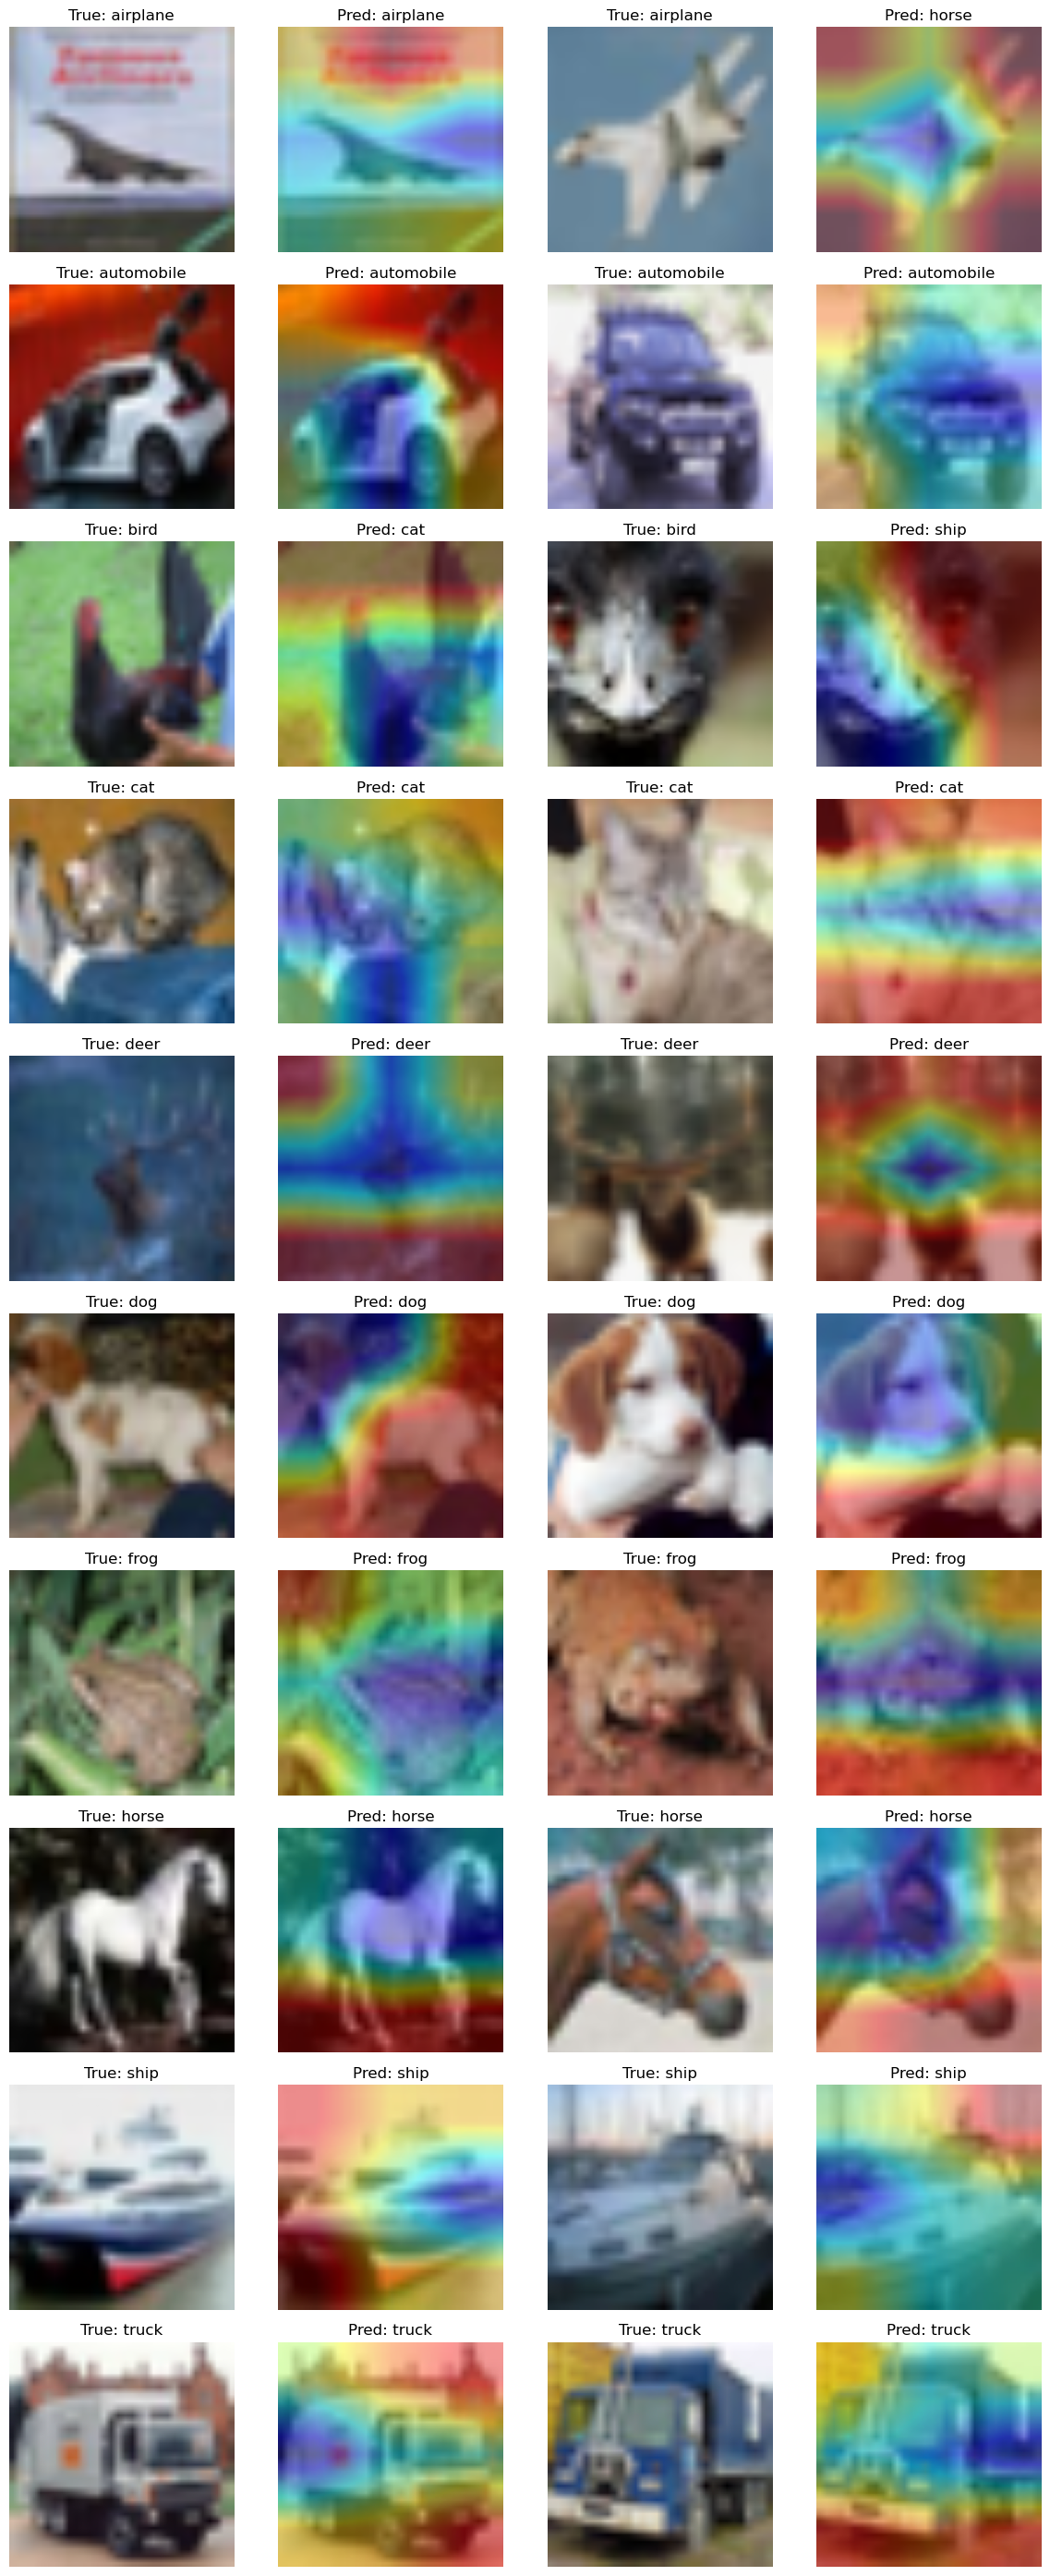

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model

# Load preprocessed data
X_test_resized = np.load("X_test_resized.npy")
y_test_cat = np.load("y_test_cat.npy")
y_test_labels = np.argmax(y_test_cat, axis=1)

# Class names
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']

# Select 2 images per class
selected_indices = []
for class_idx in range(10):
    indices = np.where(y_test_labels == class_idx)[0][:2]
    selected_indices.extend(indices)

selected_images = X_test_resized[selected_indices]
selected_labels = y_test_labels[selected_indices]

# Get the last convolutional layer of the model
last_conv_layer_name = None
for layer in reversed(model.layers):
    if len(layer.output_shape) == 4:
        last_conv_layer_name = layer.name
        break

# Improved Grad-CAM function
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(np.expand_dims(img_array, axis=0))
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]
    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy(), int(pred_index)

# Display images with Grad-CAM overlays
fig, axes = plt.subplots(nrows=10, ncols=4, figsize=(12, 28))

for i, (img, label) in enumerate(zip(selected_images, selected_labels)):
    heatmap, predicted_class = make_gradcam_heatmap(img, model, last_conv_layer_name)

    # Resize heatmap and apply JET colormap
    heatmap_resized = cv2.resize(heatmap, (96, 96))
    heatmap_uint8 = np.uint8(255 * heatmap_resized)
    heatmap_colored = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)

    # Original image to uint8
    original_uint8 = np.uint8(img * 255)

    # Overlay heatmap on original image
    overlay = cv2.addWeighted(original_uint8, 0.6, heatmap_colored, 0.4, 0)

    # Show original
    axes[i // 2, (i % 2) * 2].imshow(img)
    axes[i // 2, (i % 2) * 2].axis('off')
    axes[i // 2, (i % 2) * 2].set_title(f"True: {labels[label]}")

    # Show heatmap overlay
    axes[i // 2, (i % 2) * 2 + 1].imshow(overlay)
    axes[i // 2, (i % 2) * 2 + 1].axis('off')
    axes[i // 2, (i % 2) * 2 + 1].set_title(f"Pred: {labels[predicted_class]}")

plt.tight_layout()
plt.show()


### 3.2. Critical analysis

<Span Style = "Font-Size: 20px;"> <b> 1 graduate general case </b>

The most important areas according to Gradcam if we are dealing with animals are their faces, and in case of being the whole body image remains the face even if it is shown in profile. (Look Dog). In the case of inanimate objects, in Conches and trucks (Class Automobile and Truck) it is fixed in the body, specifically the front where the capo and the grill is.

It makes sense that the characteristics in which Gradcam is fixed are these. The body of a dog and bird are clearly different, but dog and cat can generate confusion. Therefore, his faces is the characteristic that most helps to classify correctly.In the case of inanimate objects the same thing happens. The sides of a truck or car according to the image could appear to be of the same class, but if we look at the grill (front) it is almost impossible not to distinguish it since they are different by design.

This is reflected in the heat maps, the blue part is concentrated in the faces and part of the design of the inanimate objects. In general, the edges of the image are despised by GradCam, do not generate activation

<Span Style = "Font-Size: 20px;"> <b> 2 problems with gradcam </b> 

Looking at some activation maps we see that Gradcam has problems when the element to be classified has a background whose color partially coincides with what you want to classify. The first airplane and the second Bird (ostrich) are an example. The ostrich is only activated on the left side of the face because its other part has a color similar to the upper right background.The class that has more problems seems to be Ship. The reason is the environment in which the ships are. Both have other ships or objects similar to him, this I think makes their classification difficult. In the first, the activation map is concentrated on the side while in the second it is on the bow. It is striking because in the rest of the cases the characteristic sought is always the same in both figures, for example, the face. Here instead the side of the ship is sought on the one hand and on the other the bow.

<Span Style = "Font-Size: 20px;"> <b> 3 Curiosities with Gradcam </b> 

In the case of the Aercam class (deer) Gradcam acts perfectly, this is reflected on the activation map. This is because its antlers is a characteristic element that is difficult to find in any background that we choose. I was surprised how precise the activation map is in this case. \
I imagine the same thing with other animals that have characteristics that stand out as the neck lizard with flyers (chlamydosaurus kingii).

## 4. Conclusions

**1 comparison with other algorithms** \
Within the view in the master, we have encountered several algorithms to perform Logistic Vistion classifications, Decision Trees Support Vector Machines (SVM), Naive Bayes among others. \
In this practice we have used the CNNS that are convolutional neruonal networks that also serve for multiclase classification. 

During the pratics we have seen that the CNNS unlike the other Machine Learning algorithms has many parameters to be adjusted. This has a positive side and negative. The negative is that its performance has a high variance, so if you do not adjust well it will give poor performance. The positive side is precisely this variance, if we adjust well achieve a very good model for classification.

**2 designed models** \
At first we have designed a model called model 1 that is as simple as possible. Several COV2D layers, maxpooling2D and a final dense layer. Its performance has been 67.93%. \
As it was not enough we have designed a model 2 where a model has been "imported" that has been optimized with a different dataset to CIFFAR-10, this being larger and with more classes. By using it on CIFFAR-10 we have obtained an improvement in the results. Its performance has been 80.98%\
Finally we have made a model 3 where several layers of the "Imported" neuronal network have been defrosted. Its performance has been 84.69%.

**2 designed models** \
In the visualization part with GradCam I have chosen to use model 3 for its good performance. Indeed, this is reflected in activation maps. In general, they are quite accurate when concentrating the blue part of the map on the faces of the animals. This implies that the model works correctly.